## <center>  **Homework 1** <center>

<center>  Anlly Vanesa Velez Orozco CC. 1039475251 <center> 
<center> Minería de datos 2022-1 <center> 

## Desde esta web (https://www.gutenberg.org/browse/scores/top) descarga el libro de Adventures of Huckleberry Finn, by Mark Twain (en formato TXT)



In [ ]:
#importando librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Cargando el libro 
from urllib.request import urlopen
contents = urlopen("https://www.gutenberg.org/cache/epub/32325/pg32325.txt").read().decode('utf-8')

#print(contents)
#print(type(contents))

## a) Analice el libro contando la aparición de tres nombres de personajes principales: Jim, Tom, Huck a través de los capítulos del libro.

Inicialmente, se toma el texto completo en formato str y de divide en capítulos utilizando el método split con la palabra "CHAPTER". Así se obtienen 44 elementos nuevos correspondientes a 44 capítulos

In [ ]:
## Separando el texto en capítulos, donde la palabra Chapter aparezca
Chapter = contents.split("\nCHAPTER")

print(len(Chapter)) ##Número de capítulos en el texto

44


Luego, con un ciclo se busca en cada capítulo del libro los nombres de los personajes principales: "Tom","Jim","Huck" y se almacenan en un dataframe nuevo. Notar que el primer elemento, es decir df[0], corresponde a el prologo o la introducción del texto y por ende no debe ser tenido en cuenta.

In [ ]:
df = pd.DataFrame({ "chapter_"+str(i): [Chapter[i].count(j) for j in ["Tom","Jim","Huck"]] 
                   for i in range(len(Chapter)) },
                   index=["Tom","Jim","Huck"])
df

,chapter_0,chapter_1,chapter_2,chapter_3,chapter_4,chapter_5,chapter_6,chapter_7,chapter_8,chapter_9,...,chapter_34,chapter_35,chapter_36,chapter_37,chapter_38,chapter_39,chapter_40,chapter_41,chapter_42,chapter_43
Tom,3,6,24,5,0,0,0,2,2,0,...,15,14,18,9,32,11,11,8,30,6
Jim,6,0,16,0,8,0,0,0,22,11,...,17,18,23,4,27,10,13,0,12,6
Huck,4,3,2,2,1,0,2,0,5,1,...,4,8,1,0,2,0,3,0,2,3


##b) Guarde sus resultados en un formato Pandas DataFrame para que se vea de la siguiente manera:

A continuación se muestra el data set sin considerar el primer elemento 

In [ ]:
df.drop(['chapter_0'], axis=1)

,chapter_1,chapter_2,chapter_3,chapter_4,chapter_5,chapter_6,chapter_7,chapter_8,chapter_9,chapter_10,...,chapter_34,chapter_35,chapter_36,chapter_37,chapter_38,chapter_39,chapter_40,chapter_41,chapter_42,chapter_43
Tom,6,24,5,0,0,0,2,2,0,0,...,15,14,18,9,32,11,11,8,30,6
Jim,0,16,0,8,0,0,0,22,11,19,...,17,18,23,4,27,10,13,0,12,6
Huck,3,2,2,1,0,2,0,5,1,0,...,4,8,1,0,2,0,3,0,2,3


##c) Exporte la tabla a un archivo CSV.

In [ ]:
#Exportando el data ser a un csv
df.to_csv('book.csv')

## d) Importe el archivo CSV guardado usando Pandas y haga un gráfico de la ocurrencia acumulada (cumsum) de los caracteres.

In [ ]:
#Cargando el data set anteriormente exportado
df_read=pd.read_csv('book.csv')
df_read.drop(['chapter_0'], axis=1)

,Unnamed: 0,chapter_1,chapter_2,chapter_3,chapter_4,chapter_5,chapter_6,chapter_7,chapter_8,chapter_9,...,chapter_34,chapter_35,chapter_36,chapter_37,chapter_38,chapter_39,chapter_40,chapter_41,chapter_42,chapter_43
0,Tom,6,24,5,0,0,0,2,2,0,...,15,14,18,9,32,11,11,8,30,6
1,Jim,0,16,0,8,0,0,0,22,11,...,17,18,23,4,27,10,13,0,12,6
2,Huck,3,2,2,1,0,2,0,5,1,...,4,8,1,0,2,0,3,0,2,3


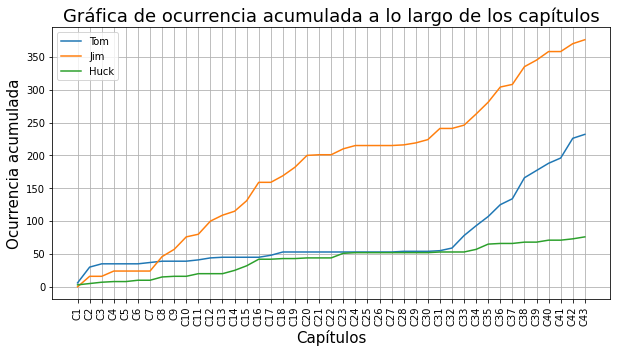

In [ ]:
##Obteniendo y graficando la suma acumulada a lo largo de los capítulos
sumtom= np.cumsum( np.array(df_read.loc[0])[2:] )
sumjim= np.cumsum( np.array(df_read.loc[1])[2:] )
sumhuck= np.cumsum( np.array(df_read.loc[2])[2:] )


names1=[]
for i in range(0,44):
  names1.append("C"+str(i))


fig, ax = plt.subplots(figsize=(10,5))
x = names1[1:]
y1 = sumtom
y2 = sumjim
y3 = sumhuck

ax.plot(x, y1,label='Tom')
ax.plot(x, y2,label='Jim')
ax.plot(x, y3,label='Huck')
plt.title("Gráfica de ocurrencia acumulada a lo largo de los capítulos",size=18)
plt.xlabel("Capítulos",size=15)
plt.ylabel("Ocurrencia acumulada" ,size=15)
plt.xticks(rotation = 90) 
plt.legend()
plt.grid()
plt.show()

De la gráfica se puede notar que la ocurrencia del nombre "Huck" a lo largo de los capítulos tiene un comportamiento casi constante respecto a los otros nombres de personajes, alcanzando un máximo en aproxímadamente 80 ocurrencias en toda la historía.

Por otro lado, la ocurrencia del nombre "Tom" se mantiene casi constante en los primeros capítulos y aumenta considerablemente a partir del capítulo 32 donde pasa de tener aproximadamente 50 apariciones a tener casi 250 en sólo 10 capítulos.

Finalmente, el nombre "Jim" crece notablemente respecto al nombre de los otros dos personajes después del capítulo 7 alcanzando al final de la historia una ocurrencia máxima de aproximadamente 370.

Con este análisis se puede concluir que el nombre "Jim" tiene gran importancia del texto y alrededor de este personaje trascurre gran parte de la historía, acompañado seguidamente por los nombres "Tom" y "Huck". Estos son grandes indicios de que se trata de los personajes principales de la historía, sin embargo es necesario verificarlo analizando a fondo el texto.